## Une image pour Ã©tudier un signal sonore

Nous allons reprÃ©senter un signal sonore comme une image en utilisant son spectrogramme, c'est Ã  dire le module de sa transformÃ©e de Fourier Ã  court terme.

Text(0.5, 1.0, 'zoom sur les basses frÃ©quences')

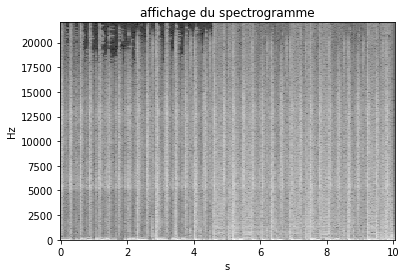

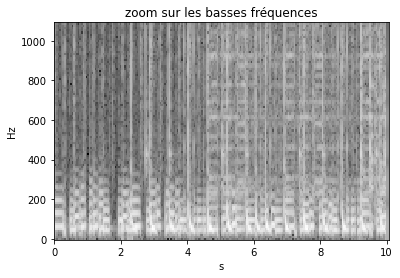

In [74]:
%matplotlib inline
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

import soundfile as sf
import IPython.display 


x_loop, Fe = sf.read("myloop.wav")
x_loop = x_loop[:10*Fe,0] # nous ne prenons qu'un seul canal et 10 secondes uniquement

f, t, tfct = sig.stft(x_loop, fs=1, nperseg=4096)
image = np.log(np.abs(tfct))
plt.figure(1)
#plt.imshow(image, aspect='auto', extent = [t[0]/Fe, t[-1]/Fe, f[-1]*Fe, f[0]*Fe], cmap='gray')  
# imshow met les pixels de haut en bas donc dans le cas prÃ©sent, on utilise plutÃ´t pcolormesh 
#      pour avoir les basses frÃ©quences en bas et les hautes frÃ©quence en haut
plt.pcolormesh(t/Fe, f*Fe, image, shading='auto', cmap='gray')  
plt.xlabel('s')
plt.ylabel('Hz')
plt.title('affichage du spectrogramme')
plt.figure(2)
plt.pcolormesh(t/Fe, f[:len(f)//20]*Fe, image[:len(f)//20, :], shading='auto', cmap='gray')
plt.xlabel('s')
plt.ylabel('Hz')
plt.title('zoom sur les basses frÃ©quences')

Le but de ce notebook est de crÃ©er deux filtres 2D: un qui dÃ©tecte des lignes horizontales et un qui dÃ©tecte des lignes verticales. Pour cela, il faut dÃ©finir un noyau de convolution h et l'appliquer sur l'image.

## Fitre passe-bas
CommenÃ§ons par crÃ©er un filtre passe-bas 2D.

Construire un noyau de filtre 2D sÃ©parable de la forme $h(x,y)=ð‘¤(x)ð‘¤(y)$
en utilisant le produit tensoriel de Python et la fonction hanning pour des valeurs faibles de longueur ð¿ (typ. de 3 Ã  51).
Rque : np.outer(vecteur, vecteur) = matrice.

On normalisera le noyau de maniÃ¨re Ã  avoir $\hat h(0,0)=1$.

Filtrer lâ€™image Ã  lâ€™aide de scipy.signal.convolve2d et afficher le rÃ©sultat : filtered_image = sig.convolve2d(I, np.rot90(h), mode='same')

Quel est lâ€™effet de ce filtrage ? Quel rÃ´le joue le paramÃ¨tre L ?

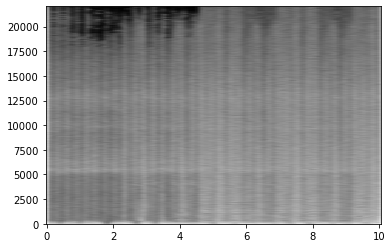

In [69]:
L = 10
h = np.outer(np.hanning(L), np.hanning(L))
h = h / np.sum(h)
filtered_image = sig.convolve2d(image, np.rot90(h), mode='same')
plt.pcolormesh(t/Fe, f*Fe, filtered_image, shading='auto', cmap='gray')


## filtre passe-haut vertical et passe-bas horizontal

Proposer un autre noyau de convolution qui amplifie les variations dans une direction et les atÃ©nue dans l'autre

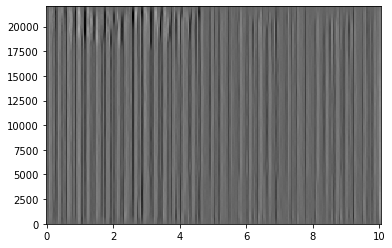

In [100]:
L = 100
h = np.outer(np.array([-1, 1]), np.ones(L)/L)
filtered_image = sig.convolve2d(image, np.rot90(h), mode='same')
plt.pcolormesh(t/Fe, f*Fe, filtered_image, shading='auto', cmap='gray')


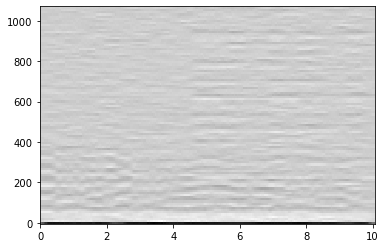

In [101]:
L = 10
h = np.outer(np.ones(L)/L, np.array([-1, 1]))
filtered_image = sig.convolve2d(image, np.rot90(h), mode='same')
plt.pcolormesh(t/Fe, f[:100]*Fe, filtered_image[:100,:], shading='auto', cmap='gray')


In [97]:
image

array([[ -6.09187711,  -7.77550068,  -9.73217834, ...,  -7.54095171,
         -5.44901335,  -5.96656262],
       [ -5.71221366,  -6.60122112,  -8.06948516, ...,  -7.3527523 ,
         -5.63208356,  -5.93928922],
       [ -4.98623093,  -5.94149712,  -7.34749321, ...,  -6.90440546,
         -5.23819443,  -5.87085372],
       ...,
       [ -9.12019809,  -9.32944775, -11.8292087 , ..., -10.01782027,
         -9.93553989, -11.52714288],
       [ -9.16766353,  -9.61603343, -11.99708494, ...,  -9.43119423,
        -10.53561558, -11.49984048],
       [ -9.22219207, -10.61650969, -12.40690897, ...,  -9.29756949,
         -9.74982854, -11.49017531]])